In [35]:
import pandas as pd
import os

## Getting the values and contacting them in one dataframe.

In [37]:
folder_path='./data'
for file_name in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, file_name)):
        print(file_name)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [39]:
folder_path='./data'
df = pd.DataFrame()
for file_name in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, file_name)):
        temp_df=pd.read_csv(os.path.join(folder_path, file_name))
        df = pd.concat([df, temp_df], axis=0) 

## Data Cleaning

In [40]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [43]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [75]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,185950,185950,185950,185950,185950,185950
unique,178437,19,9,23,142395,140787
top,160873,USB-C Charging Cable,1,11.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,5,21903,168552,21903,8,9


In [71]:
df = df[~(df['Order ID'] == 'Order ID')]

In [104]:
df['Order ID'].value_counts()>1

Order ID
160873     True
178158     True
277875     True
196615     True
304802     True
          ...  
158177    False
158178    False
158179    False
158180    False
259357    False
Name: count, Length: 178437, dtype: bool

In [73]:
df['Order Date'].value_counts()

Order Date
12/15/19 20:16    8
12/11/19 13:24    7
10/30/19 21:28    7
04/02/19 13:24    7
12/12/19 09:48    6
                 ..
01/18/19 18:04    1
01/07/19 19:48    1
01/23/19 17:59    1
01/26/19 10:28    1
09/30/19 00:18    1
Name: count, Length: 142395, dtype: int64

### Remove missing values

In [84]:
df=df.dropna()

In [86]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [106]:
df[df['Order ID'].map(df['Order ID'].value_counts()) > 1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301"
11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"


## In which month was the highest revenue achieved?

In [109]:
## convert Order date collumn to dateTime type:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_16532\3826562527.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [117]:
df['month']=df['Order Date'].dt.month_name()

In [121]:
df['month'].value_counts()

month
December     24984
October      20282
April        18279
November     17573
May          16566
March        15153
July         14293
June         13554
February     11975
August       11961
September    11621
January       9709
Name: count, dtype: int64

<Axes: ylabel='month'>

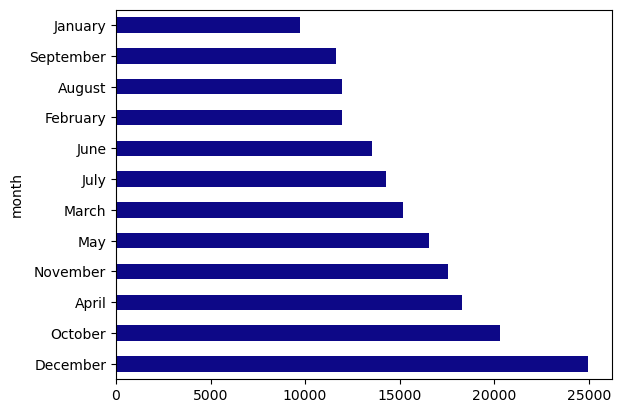

In [134]:
df['month'].value_counts().plot(kind='barh',colormap='plasma')

In [138]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [144]:
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)
df['Price Each']=df['Price Each'].astype(float)

In [146]:
df['Order Total']=df['Quantity Ordered']*df['Price Each']

<Axes: ylabel='month'>

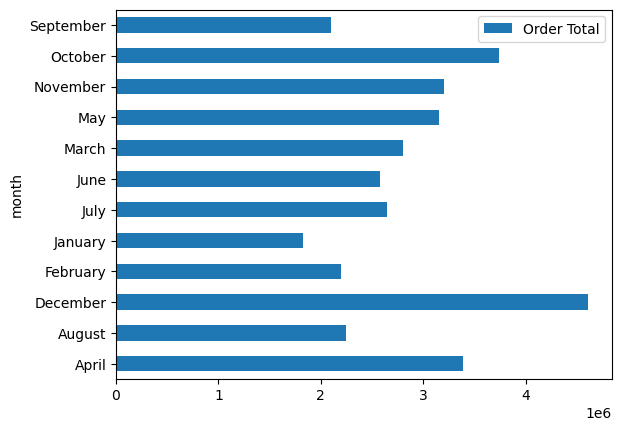

In [154]:
df[['month','Order Total']].groupby('month').sum().plot(kind='barh')

* Le mois en reailleir la mielleur chifre d'affaire est  **December**

## In which city do we make the most sales?

In [161]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Order Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


In [167]:
def extarct_city(addres):
    return addres.split(',')[1].strip()

In [171]:
df['City']=df['Purchase Address'].apply(extarct_city)

<Axes: xlabel='City'>

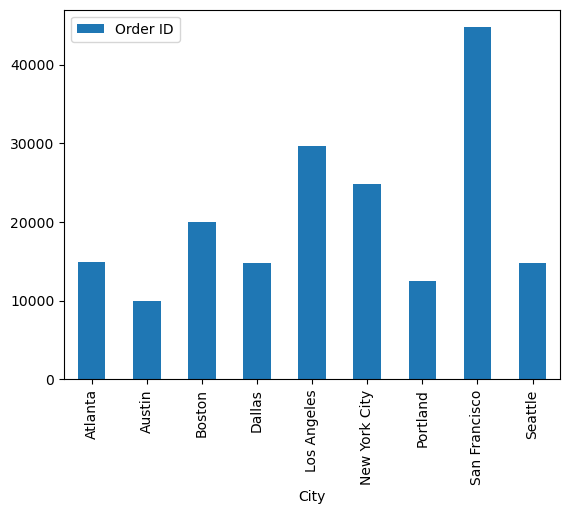

In [201]:
df[['Order ID','City']].groupby('City').count().plot(kind='bar')

## When should we run an advertising campaign to get the most sales?

In [231]:
df['hour']=df['Order Date'].dt.hour

<Axes: xlabel='hour'>

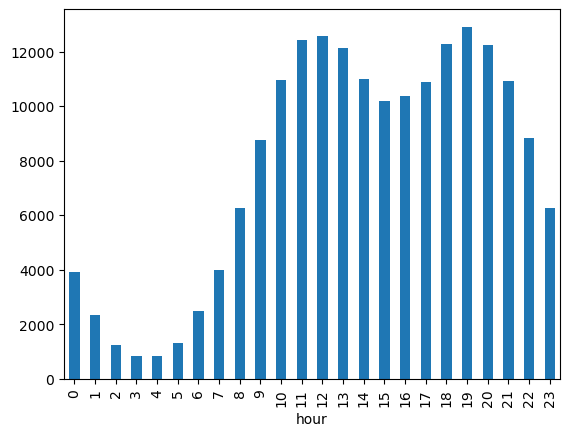

In [249]:
df.hour.value_counts().sort_index().plot(kind='lin')

We noticed that there is an **increase in sales around 12 o'clock**, which can be described as when our clients take their lunch break.
We also noticed another **increase around 19 o'clock**, which can be described as when people are heading home.

> Therefore, the best time to run advertising campaigns would be during these hours.


## Which product sells the most?

In [260]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Order Total,City,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles,9


<Axes: ylabel='Product'>

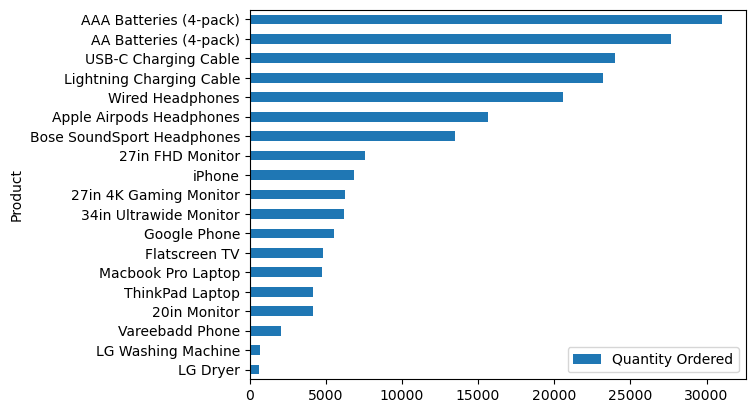

In [275]:
df[['Quantity Ordered','Product']].groupby('Product').sum().sort_values(by='Quantity Ordered').plot(kind='barh')

> We noticed that the products that sell the most are:

* AAA Batteries (4-pack)
* AA Batteries (4-pack)
* USB-C Charging Cable

In [299]:
df.groupby('Product')['Price Each'].mean().sort_values()

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

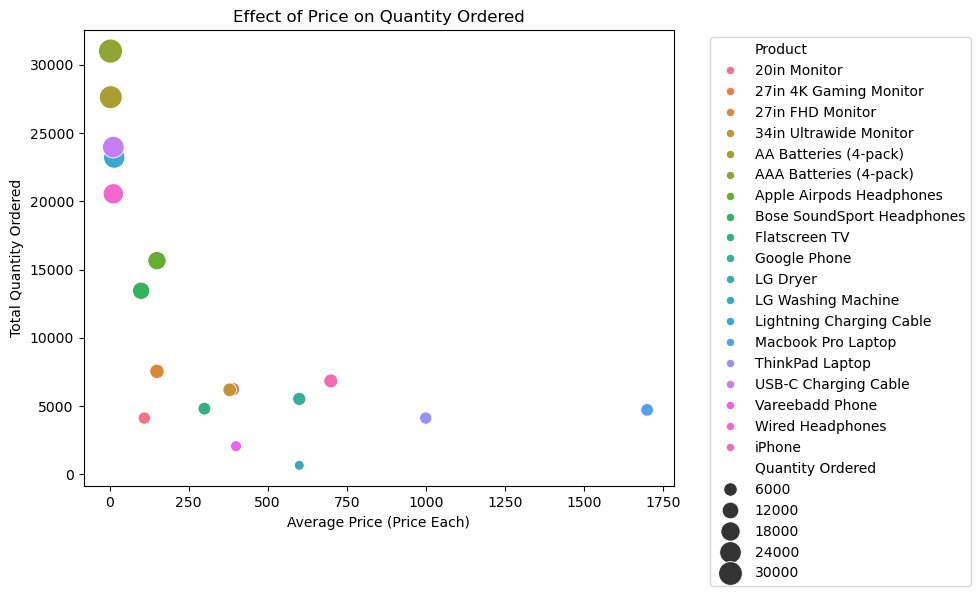

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total quantity ordered and the average price for each product
product_summary = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).reset_index()

# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=product_summary, 
    x='Price Each',
    y='Quantity Ordered', 
    hue='Product', 
    size='Quantity Ordered', 
    sizes=(50, 300)
)
plt.title('Effect of Price on Quantity Ordered')
plt.xlabel('Average Price (Price Each)')
plt.ylabel('Total Quantity Ordered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


> We also observed that these products have lower prices.

## What are the product combinations that sell the most?

In [328]:
df_duplicated=df[df['Order ID'].duplicated(keep=False)]

In [357]:
df_duplicated.groupby('Order ID')['Product'].value_counts()

Order ID  Product                 
141275    USB-C Charging Cable        1
          Wired Headphones            1
141290    AA Batteries (4-pack)       1
          Apple Airpods Headphones    1
141365    Vareebadd Phone             1
                                     ..
319584    iPhone                      1
319596    Lightning Charging Cable    1
          iPhone                      1
319631    34in Ultrawide Monitor      1
          Lightning Charging Cable    1
Name: count, Length: 14338, dtype: int64